1. Import Libraries and Load Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('ecommerce_churn.csv')
df.head()


,UserID,VisitsLast30Days,TimeOnSite,PurchaseCount,HasSupportTicket,Churned
0,5001,41,7.2,0,No,Yes
1,5002,34,15.2,8,No,No
2,5003,6,13.3,5,No,Yes
3,5004,15,17.1,6,Yes,Yes
4,5005,25,13.5,9,Yes,No


2. Data Cleaning (Encode Categoricals and Check Missing Values)

In [26]:
# Encode categorical variables (Yes=1,No=0)
df['Churned'] = df['Churned'].map({'Yes': 1, 'No': 0})
df['HasSupportTicket'] = df['HasSupportTicket'].map({'Yes': 1, 'No': 0})

print(df.isnull().sum())

UserID              0
VisitsLast30Days    0
TimeOnSite          0
PurchaseCount       0
HasSupportTicket    0
Churned             0
dtype: int64


In [27]:
print(df.head())
print(df.columns)
print(df['Churned'].unique())
print(df['Churned'].value_counts())


   UserID  VisitsLast30Days  TimeOnSite  PurchaseCount  HasSupportTicket  \
0    5001                41         7.2              0                 0   
1    5002                34        15.2              8                 0   
2    5003                 6        13.3              5                 0   
3    5004                15        17.1              6                 1   
4    5005                25        13.5              9                 1   

   Churned  
0        1  
1        0  
2        1  
3        1  
4        0  
Index(['UserID', 'VisitsLast30Days', 'TimeOnSite', 'PurchaseCount',
       'HasSupportTicket', 'Churned'],
      dtype='object')
[1 0]
Churned
0    31
1    19
Name: count, dtype: int64


3.Basic EDA (Exploratory Data Analysis)

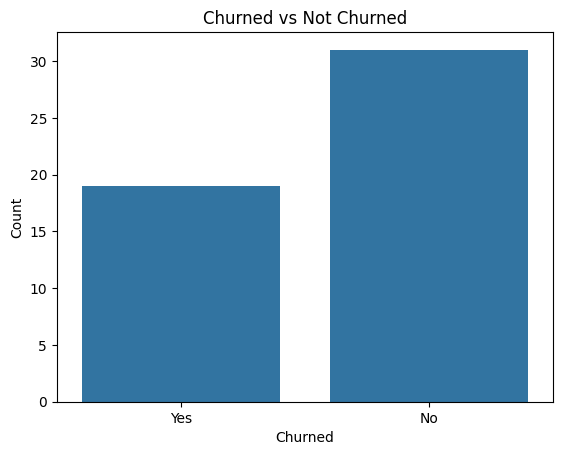

           UserID  VisitsLast30Days  TimeOnSite  PurchaseCount  \
count    50.00000         50.000000   50.000000      50.000000   
mean   5025.50000         25.540000   11.700000       4.840000   
std      14.57738         14.758201    5.618337       2.845404   
min    5001.00000          0.000000    1.300000       0.000000   
25%    5013.25000         15.000000    7.050000       3.000000   
50%    5025.50000         26.500000   11.900000       5.000000   
75%    5037.75000         35.750000   17.175000       7.000000   
max    5050.00000         48.000000   19.800000       9.000000   

       HasSupportTicket    Churned  
count         50.000000  50.000000  
mean           0.520000   0.380000  
std            0.504672   0.490314  
min            0.000000   0.000000  
25%            0.000000   0.000000  
50%            1.000000   0.000000  
75%            1.000000   1.000000  
max            1.000000   1.000000  
Purchase Count Mean by Churn:
 Churned
0    5.032258
1    4.526316
Name:

<Figure size 640x480 with 0 Axes>

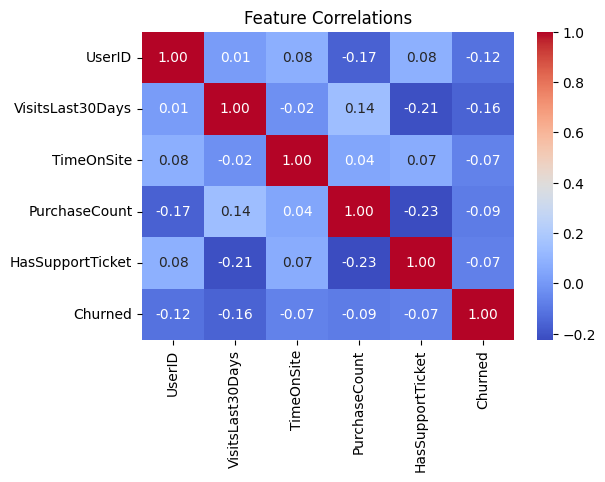

<Figure size 640x480 with 0 Axes>

In [34]:
# Churn distribution
sns.countplot(x=df['Churned'].map({1:'Yes', 0:'No'}))
plt.title('Churned vs Not Churned')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()
plt.savefig('churn_distribution.png')

# Feature summary statistics
print(df.describe())

# Compare means by churn status
print("Purchase Count Mean by Churn:\n", df.groupby('Churned')['PurchaseCount'].mean())
print("VisitsLast30Days Mean by Churn:\n", df.groupby('Churned')['VisitsLast30Days'].mean())
print("TimeOnSite Mean by Churn:\n", df.groupby('Churned')['TimeOnSite'].mean())

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlations')
plt.show()
plt.savefig('correlation_heatmap.png')


4. Train-Test Split for Modeling

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(['UserID', 'Churned'], axis=1)
y = df['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Train a Basic ML Model (Logistic Regression)

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

6. Evaluate Model Results

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show model coefficients for feature importance
for f, coef in zip(X.columns, model.coef_[0]):
    print(f"{f}: {coef:.3f}")

Accuracy: 0.4
Confusion Matrix:
 [[4 0]
 [6 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10

VisitsLast30Days: -0.033
TimeOnSite: -0.088
PurchaseCount: -0.179
HasSupportTicket: 0.010


C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod